In [450]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from matplotlib.colors import ListedColormap
from matplotlib.widgets import Button

In [451]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [452]:
from sklearn.model_selection import train_test_split

In [453]:
# a = [[randint(60, 100), randint(0, 100)] for i in range(42)]
# b = [[randint(0, 60), randint(0, 60)] for i in range(42)]

# k1 = np.array(a)
# k2 = np.array(b)

# x1 = [randint(70, 100) for i in range(42)]
# y1 = [randint(0, 100) for i in range(42)]

# x2 = [randint(0, 50) for i in range(42)]
# y2 = [randint(0, 45) for i in range(42)]


rgen = np.random.RandomState(42)

x1 = rgen.normal(loc=80.0, scale=10.0, size=42)
y1 = rgen.normal(loc=50.0, scale=15.0, size=42)

x2 = rgen.normal(loc=30.0, scale=8.0, size=42)
y2 = rgen.normal(loc=30.0, scale=8.0, size=42)


k1 = np.array([x1, y1])
k2 = np.array([x2, y2])

k1

array([[84.96714153, 78.61735699, 86.47688538, 95.23029856, 77.65846625,
        77.65863043, 95.79212816, 87.67434729, 75.30525614, 85.42560044,
        75.36582307, 75.34270246, 82.41962272, 60.86719755, 62.75082167,
        74.37712471, 69.8716888 , 83.14247333, 70.91975924, 65.87696299,
        94.65648769, 77.742237  , 80.67528205, 65.75251814, 74.55617275,
        81.1092259 , 68.49006423, 83.75698018, 73.9936131 , 77.0830625 ,
        73.98293388, 98.52278185, 79.86502775, 69.42289071, 88.22544912,
        67.7915635 , 82.08863595, 60.40329876, 66.71813951, 81.96861236,
        87.3846658 , 81.71368281],
       [48.26527576, 45.48344457, 27.82217014, 39.20233687, 43.09041844,
        65.85683339, 55.15427434, 23.55439767, 54.86125954, 44.22376579,
        39.84617   , 59.17514433, 65.46499284, 63.96920179, 37.41173715,
        45.36181436, 54.96895147, 64.63317691, 42.81238643, 47.21511535,
        33.40497539, 32.05690064, 62.18788734, 70.34360043, 48.91984818,
        65.05299

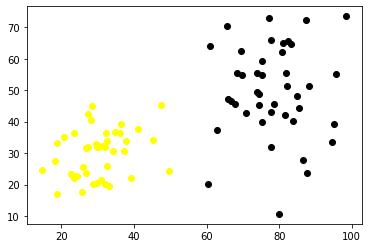

In [454]:
plt.scatter(k2[0], k2[1], color='yellow', marker='o', label='class 2')
plt.scatter(k1[0], k1[1], color='black', marker='o', label='class 1')
plt.show()

In [455]:
class Perceptron:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        print(self.w_.shape)

        for i in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0, 1, -1)

In [456]:
print(k1)
print(k1.T)

[[84.96714153 78.61735699 86.47688538 95.23029856 77.65846625 77.65863043
  95.79212816 87.67434729 75.30525614 85.42560044 75.36582307 75.34270246
  82.41962272 60.86719755 62.75082167 74.37712471 69.8716888  83.14247333
  70.91975924 65.87696299 94.65648769 77.742237   80.67528205 65.75251814
  74.55617275 81.1092259  68.49006423 83.75698018 73.9936131  77.0830625
  73.98293388 98.52278185 79.86502775 69.42289071 88.22544912 67.7915635
  82.08863595 60.40329876 66.71813951 81.96861236 87.3846658  81.71368281]
 [48.26527576 45.48344457 27.82217014 39.20233687 43.09041844 65.85683339
  55.15427434 23.55439767 54.86125954 44.22376579 39.84617    59.17514433
  65.46499284 63.96920179 37.41173715 45.36181436 54.96895147 64.63317691
  42.81238643 47.21511535 33.40497539 32.05690064 62.18788734 70.34360043
  48.91984818 65.05299347 55.42454038 40.32320368 55.42093408 73.0705485
  49.46260941 73.46965484 10.70382344 62.32853757 51.30570602 45.51488974
  51.37641165 20.18646628 46.70492168 55

In [457]:
k1 = k1.T
k2 = k2.T

In [458]:
X = np.zeros((84, 2))
X[:42] = k1
X[42:] = k2

# X /= 100

In [459]:
y = np.ones((84), dtype=int)
y[:42] = -1
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [460]:
# rgen = np.random.RandomState(1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state = 1, stratify=y)
# y_train

In [461]:
rgen = np.random.RandomState(1)

# rgen.shuffle(X)
# rgen.shuffle(y)

# print(X)
# print('_____')
q = list(zip(X, y))
# print(q)
rgen.shuffle(q)
# print(q)
X, y = zip(*q)
X = np.array(X)
y = np.array(y)

In [462]:
ppn = Perceptron(n_iter=250)
ppn.fit(X, y)

(3,)


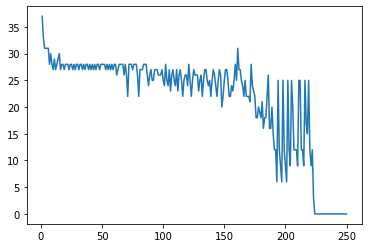

In [463]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_)
plt.show()

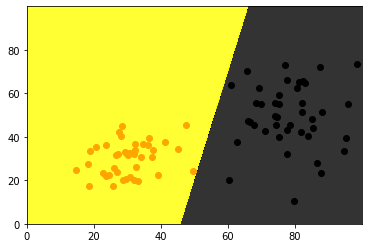

In [464]:
x1_min, x1_max = 0, 100
x2_min, x2_max = 0, 100
resol = 0.1

cmap = ListedColormap(['black', 'yellow'])
k1 = k1.T
k2 = k2.T

xx1, xx2 = np.meshgrid(
    np.arange(x1_min, x1_max, resol),
    np.arange(x2_min, x2_max, resol)
)


Z = ppn.predict(
    np.array([xx1.ravel(), xx2.ravel()]).T
)

Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.8, cmap=cmap)
plt.scatter(k2[0], k2[1], color='orange', marker='o', label='class 2')
plt.scatter(k1[0], k1[1], color='black', marker='o', label='class 1')
plt.show()